# House Prices: Advanced Regression Techniques

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
house_prices = pd.read_csv('../train_wo_missing_values.csv')

In [3]:
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
house_prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.274315,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,23.080125,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
a = house_prices.isna().sum()
a[a > 0]

Series([], dtype: int64)

In [6]:
a = house_prices.corr()[(abs(house_prices.corr()) > 0.6) & (house_prices.corr() < 1)]
a.dropna(axis=1, how='all').dropna(axis=0, how='all')

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice
OverallQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600671,NaN,0.790982
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.845141,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604353,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,NaN,0.819530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613581
1stFlrSF,NaN,NaN,NaN,NaN,0.819530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605852
2ndFlrSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.687501,NaN,NaN,0.609707,NaN,0.616423,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,NaN,NaN,NaN,0.687501,NaN,NaN,0.630012,NaN,NaN,0.825489,NaN,NaN,NaN,0.708624
BsmtFullBath,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FullBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.630012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
house_prices.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Sc

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
y = np.log(house_prices['SalePrice'])

In [10]:
house_prices[house_prices['LotArea'] < 1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


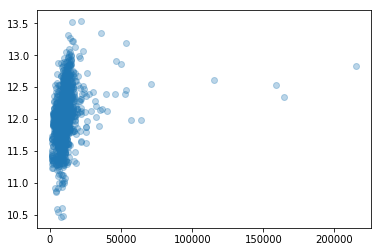

In [11]:
plt.scatter(house_prices['LotArea'], y, alpha=0.3)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


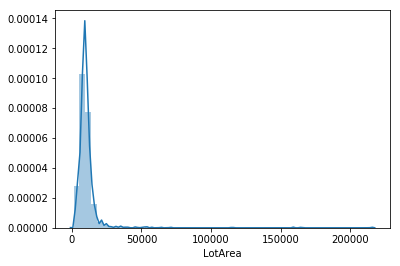

In [12]:
sns.distplot(house_prices['LotArea'])

In [13]:
from scipy import stats

In [14]:
trans, lam = stats.boxcox(house_prices['LotArea'])
lam

0.030946318971935564

0.3087225533079648 9.211329657033389 0.3999177411255904


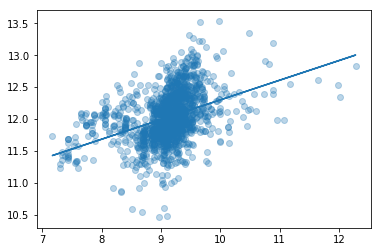

In [15]:
lot_area = np.log(house_prices['LotArea'])
plt.scatter(lot_area, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(lot_area,y)
print(slope, intercept, r_value)
y_fit = intercept + slope*lot_area
plt.plot(lot_area, y_fit)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


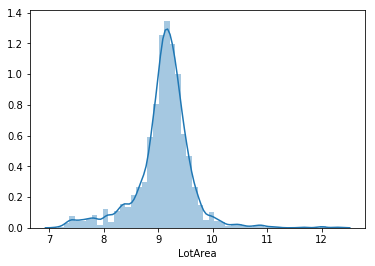

In [16]:
sns.distplot(lot_area)

In [17]:
house_prices['TotalFloor'] = house_prices['1stFlrSF'] + house_prices['2ndFlrSF']
print(house_prices.loc[:,['1stFlrSF', '2ndFlrSF', 'TotalFloor', 'GrLivArea']].head())
np.corrcoef(house_prices['TotalFloor'], house_prices['GrLivArea'])

   1stFlrSF  2ndFlrSF  TotalFloor  GrLivArea
0       856       854        1710       1710
1      1262         0        1262       1262
2       920       866        1786       1786
3       961       756        1717       1717
4      1145      1053        2198       2198


array([[1.       , 0.9957176],
       [0.9957176, 1.       ]])

In [18]:
house_prices['TotalBsmt'] = house_prices['BsmtFinSF1'] + house_prices['BsmtFinSF2'] + house_prices['BsmtUnfSF']
print(house_prices.loc[:,['TotalBsmt', 'TotalBsmtSF']].head())
np.corrcoef(house_prices['TotalBsmt'], house_prices['TotalBsmtSF'])

   TotalBsmt  TotalBsmtSF
0        856          856
1       1262         1262
2        920          920
3        756          756
4       1145         1145


array([[1., 1.],
       [1., 1.]])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


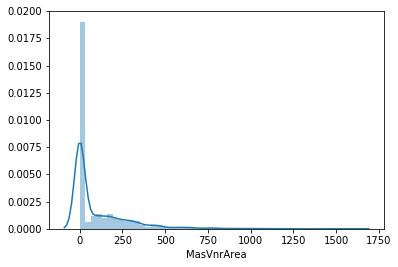

In [19]:
sns.distplot(house_prices.loc[:, 'MasVnrArea'])

In [20]:
trans, lam = stats.boxcox(house_prices.loc[house_prices['MasVnrArea']!=0, 'MasVnrArea'])
lam

0.264265606795351

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


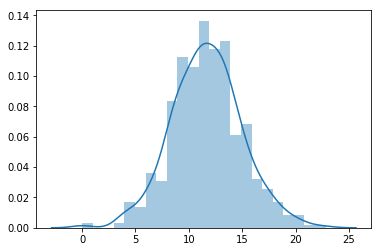

In [21]:
sns.distplot(trans)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


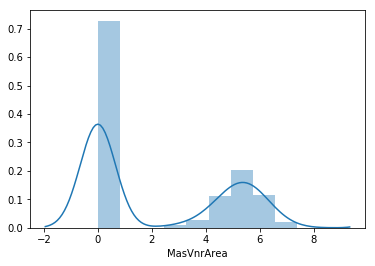

In [22]:
sns.distplot(np.log(house_prices['MasVnrArea'] + 1))

0.06280550150367938 11.890886665570905 0.4133177535362967


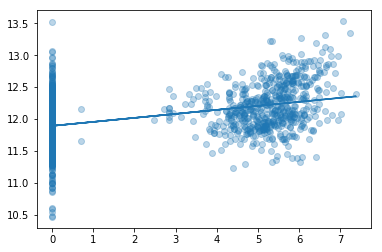

In [23]:
veneer_area = np.log(house_prices['MasVnrArea'] + 1)
plt.scatter(veneer_area, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(veneer_area, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*veneer_area
plt.plot(veneer_area, y_fit)

0.0009432569485411812 11.92678495805471 0.42677513183636506


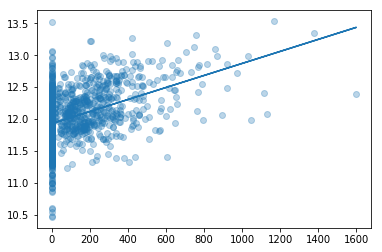

In [24]:
veneer_area = house_prices['MasVnrArea']
plt.scatter(veneer_area, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(veneer_area, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*veneer_area
plt.plot(veneer_area, y_fit)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


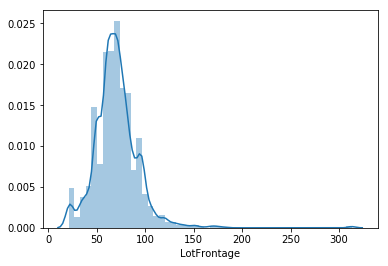

In [25]:
sns.distplot(house_prices['LotFrontage'])

In [26]:
trans, lam = stats.boxcox(house_prices['LotFrontage'])
lam

0.4052017353805059

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


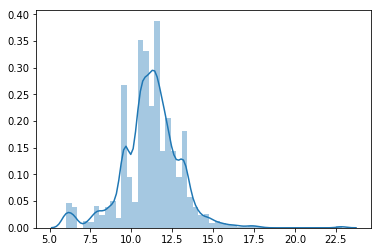

In [27]:
sns.distplot(trans)

0.005537593526222895 11.634900308926348 0.31995932883149836


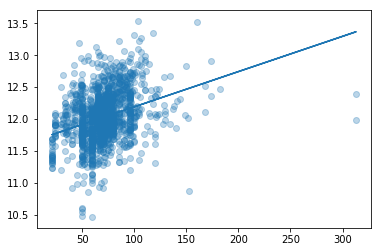

In [28]:
lot_frontage = house_prices['LotFrontage']
plt.scatter(lot_frontage, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(lot_frontage, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*lot_frontage
plt.plot(lot_frontage, y_fit)

0.0746672163871832 11.188706211881462 0.3331719936550691


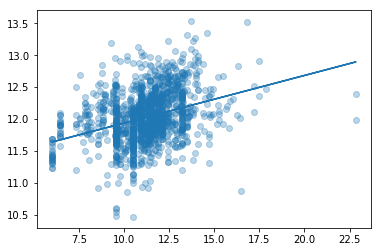

In [29]:
lot_frontage = trans
plt.scatter(lot_frontage, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(lot_frontage, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*lot_frontage
plt.plot(lot_frontage, y_fit)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


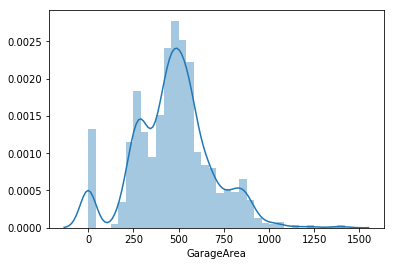

In [30]:
sns.distplot(house_prices['GarageArea'])

0.005537593526222895 11.634900308926348 0.31995932883149836


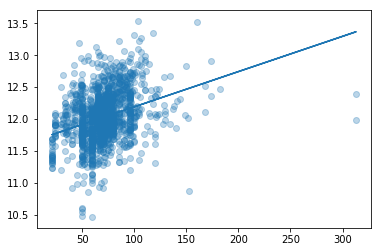

In [31]:
garage_area = house_prices['LotFrontage']
plt.scatter(garage_area, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(garage_area, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*garage_area
plt.plot(garage_area, y_fit)

In [32]:
trans, lam = stats.boxcox(house_prices['GarageArea']+1)
lam

0.8112580246118668

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


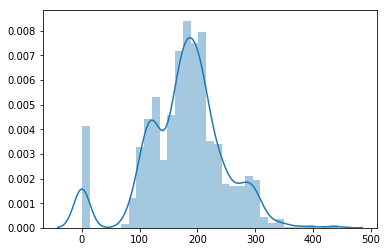

In [33]:
sns.distplot(trans)

0.0036944229765712086 11.367730370188868 0.6474710410187532


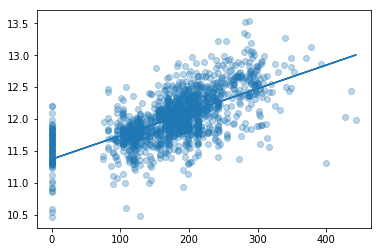

In [34]:
garage_area = trans
plt.scatter(garage_area, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(garage_area, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*garage_area
plt.plot(garage_area, y_fit)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


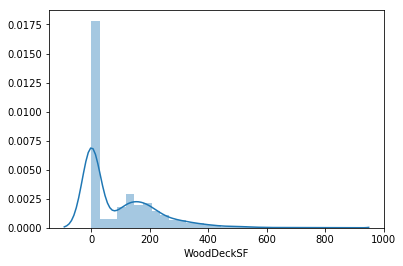

In [35]:
sns.distplot(house_prices['WoodDeckSF'])

0.0010648808314636126 11.923691717707397 0.33413507395751263


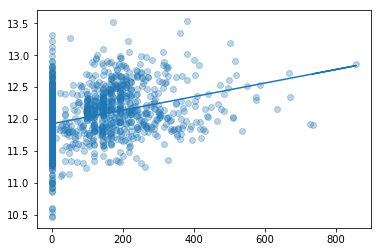

In [36]:
wood_deck = house_prices['WoodDeckSF']
plt.scatter(wood_deck, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(wood_deck, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*wood_deck
plt.plot(wood_deck, y_fit)

In [37]:
trans, lam = stats.boxcox(house_prices['WoodDeckSF']+1)
lam

-0.07859610848692371

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


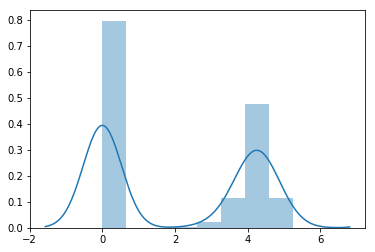

In [38]:
sns.distplot(trans)

0.06394594518675778 11.895027371884048 0.33999758319265755


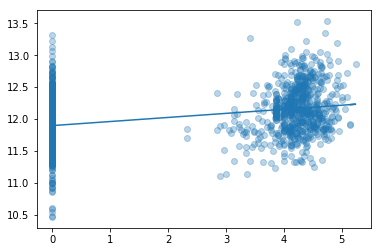

In [39]:
wood_deck = trans
plt.scatter(wood_deck, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(wood_deck, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*wood_deck
plt.plot(wood_deck, y_fit)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


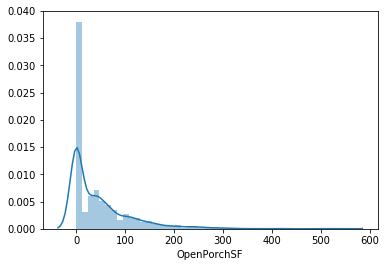

In [40]:
sns.distplot(house_prices['OpenPorchSF'])

0.0019356006386312872 11.933735245009302 0.32105297201976746


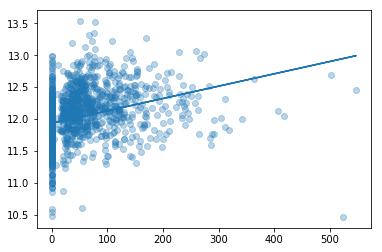

In [41]:
open_porch = house_prices['OpenPorchSF']
plt.scatter(open_porch, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(open_porch, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*open_porch
plt.plot(open_porch, y_fit)

In [42]:
trans, lam = stats.boxcox(house_prices['OpenPorchSF']+1)
lam

0.011642790488834265

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


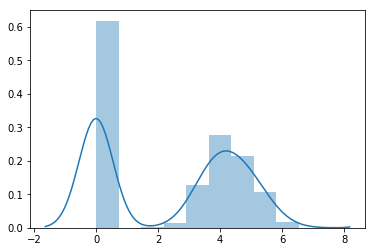

In [43]:
sns.distplot(trans)

0.08306645104987948 11.827388895700379 0.4597173246676276


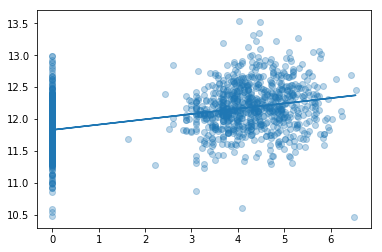

In [44]:
open_porch = trans
plt.scatter(open_porch, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(open_porch, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*open_porch
plt.plot(open_porch, y_fit)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


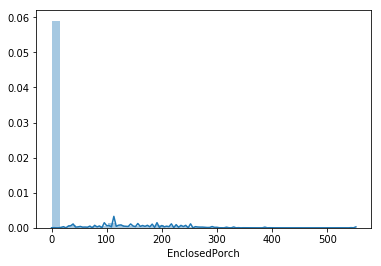

In [45]:
sns.distplot(house_prices['EnclosedPorch'])

-0.000974136825254365 12.045437207725739 -0.1490502814276764


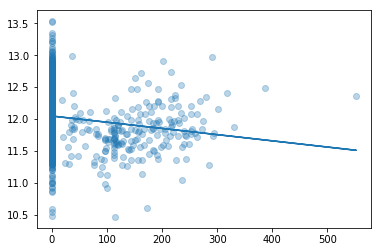

In [46]:
enclosed_porch = house_prices['EnclosedPorch']
plt.scatter(enclosed_porch, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(enclosed_porch, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*enclosed_porch
plt.plot(enclosed_porch, y_fit)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


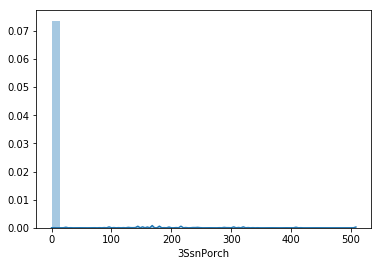

In [47]:
sns.distplot(house_prices['3SsnPorch'])

0.0007480216518341576 12.021500454682787 0.05490022646762043


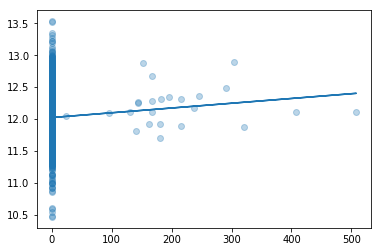

In [48]:
ssn_porch = house_prices['3SsnPorch']
plt.scatter(ssn_porch, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(ssn_porch, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*ssn_porch
plt.plot(ssn_porch, y_fit)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


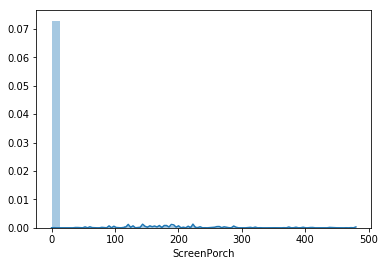

In [49]:
sns.distplot(house_prices['ScreenPorch'])

0.0008683437705774118 12.010972811266077 0.12120760489686365


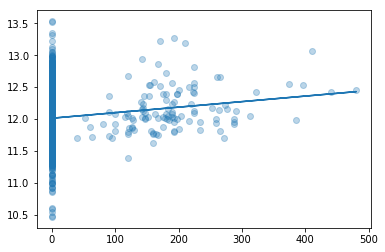

In [50]:
screen_porch = house_prices['ScreenPorch']
plt.scatter(screen_porch, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(screen_porch, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*screen_porch
plt.plot(screen_porch, y_fit)

In [51]:
trans, lam = stats.boxcox(house_prices['ScreenPorch']+1)
lam

-2.4348601128845653

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


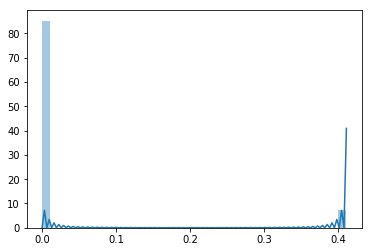

In [52]:
sns.distplot(trans)

0.35748915656334973 12.012385728460401 0.0994365701661476


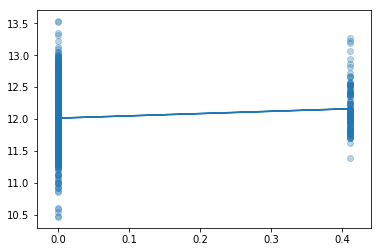

In [53]:
screen_porch = trans
plt.scatter(screen_porch, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(screen_porch, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*screen_porch
plt.plot(screen_porch, y_fit)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


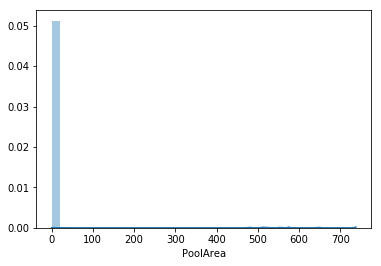

In [54]:
sns.distplot(house_prices['PoolArea'])

0.0006939455660777544 12.0221363718353 0.06979780600969175


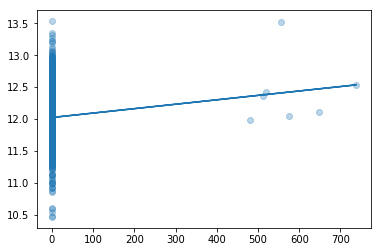

In [55]:
pool_area = house_prices['PoolArea']
plt.scatter(pool_area, y, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(pool_area, y)
print(slope, intercept, r_value)
y_fit = intercept + slope*pool_area
plt.plot(pool_area, y_fit)

In [56]:
categorical_columns = ['MSSubClass','MSZoning','Street','LotShape','LandContour','LotConfig',
                         'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                         'OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                         'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtExposure',
                         'BsmtFinType1','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
                         'Functional','FireplaceQu','GarageType','GarageFinish','PavedDrive',
                         'SaleType','SaleCondition']
continuous_variables = house_prices.loc[:, house_prices.columns[~house_prices.columns.isin(categorical_columns)]].drop(columns=['SalePrice'])
categorical_variables = house_prices.loc[:,categorical_columns]

In [57]:
for x in categorical_columns:
    categorical_variables[x] = categorical_variables[x].astype(str)

In [58]:
import pandas as pd
import scipy as sc

# Input a pandas series 
def ent(data):
    p_data= data.value_counts()/len(data) # calculates the probabilities
    entropy=sc.stats.entropy(p_data)  # input probabilities to get the entropy 
    return entropy

for column in categorical_columns:
    print('{}: {}'.format(column, ent(house_prices[column])))

MSSubClass: 2.024945527593174
MSZoning: 0.6935649180202575
Street: 0.02668099163165204
LotShape: 0.7896365039389163
LandContour: 0.43913798248820113
LotConfig: 0.8482903143803834
LandSlope: 0.23254914335239535
Neighborhood: 2.9072649340716246
Condition1: 0.6219169442683833
Condition2: 0.07486720258699345
BldgType: 0.6535643223569176
HouseStyle: 1.2883880261007623
OverallQual: 1.723871291772616
OverallCond: 1.3349118855036286
RoofStyle: 0.6255102269356729
RoofMatl: 0.11646129913995895
Exterior1st: 1.8894895558636
Exterior2nd: 1.9506677965139474
MasVnrType: 0.9304026325031689
ExterQual: 0.8257293822968184
ExterCond: 0.4379570714349328
Foundation: 1.0559633982404477
BsmtQual: 1.1132756182729444
BsmtExposure: 0.967111429177152
BsmtFinType1: 1.6092946395024277
Heating: 0.1316611814478301
HeatingQC: 1.120185929337945
CentralAir: 0.24069167661877366
Electrical: 0.34993848604117755
KitchenQual: 0.9923107993520877
Functional: 0.3514718671392047
FireplaceQu: 1.246659821593713
GarageType: 1.10062

In [59]:
def marca_base(Perc, x):
    if x >= Perc[(len(Perc)-1)]:
        return len(Perc) +1
    else:
        for i in range(len(Perc)):
            if x < Perc[i]:
                return i + 1

In [60]:
perc = list(np.percentile(house_prices.SalePrice, [10, 20, 30, 40, 50, 60, 70, 80, 90]))
house_prices['SalePrice_percentil'] = [marca_base(perc, x) for x in house_prices.SalePrice]

-------------------
#NAs= 0
MSSubClass
-------------------
#NAs= 0
MSZoning
-------------------
#NAs= 0
Street
-------------------
#NAs= 0
LotShape
-------------------
#NAs= 0
LandContour
-------------------
#NAs= 0
LotConfig
-------------------
#NAs= 0
LandSlope
-------------------
#NAs= 0
Neighborhood
-------------------
#NAs= 0
Condition1
-------------------
#NAs= 0
Condition2
-------------------
#NAs= 0
BldgType
-------------------
#NAs= 0
HouseStyle
-------------------
#NAs= 0
OverallQual
-------------------
#NAs= 0
OverallCond
-------------------
#NAs= 0
RoofStyle
-------------------
#NAs= 0
RoofMatl
-------------------
#NAs= 0
Exterior1st
-------------------
#NAs= 0
Exterior2nd
-------------------
#NAs= 0
MasVnrType
-------------------
#NAs= 0
ExterQual
-------------------
#NAs= 0
ExterCond


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


-------------------
#NAs= 0
Foundation
-------------------
#NAs= 0
BsmtQual
-------------------
#NAs= 0
BsmtExposure
-------------------
#NAs= 0
BsmtFinType1
-------------------
#NAs= 0
Heating
-------------------
#NAs= 0
HeatingQC
-------------------
#NAs= 0
CentralAir
-------------------
#NAs= 0
Electrical
-------------------
#NAs= 0
KitchenQual
-------------------
#NAs= 0
Functional
-------------------
#NAs= 0
FireplaceQu
-------------------
#NAs= 0
GarageType
-------------------
#NAs= 0
GarageFinish
-------------------
#NAs= 0
PavedDrive
-------------------
#NAs= 0
SaleType
-------------------
#NAs= 0
SaleCondition


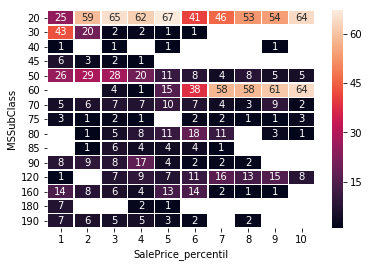

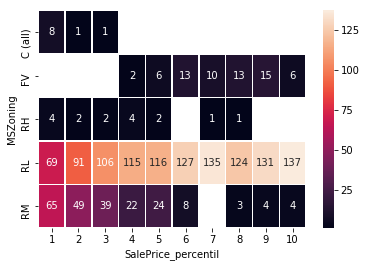

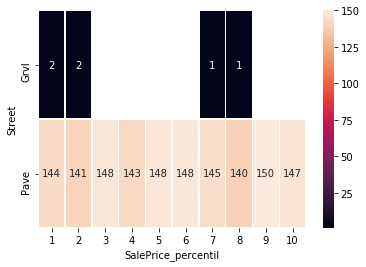

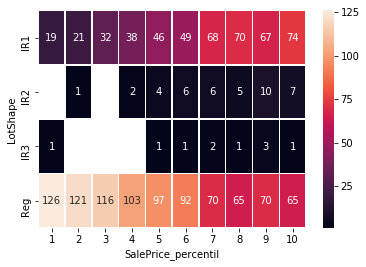

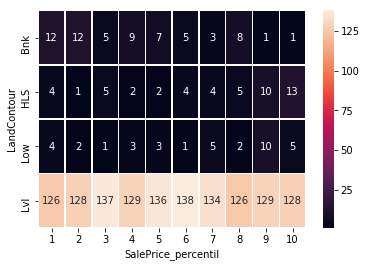

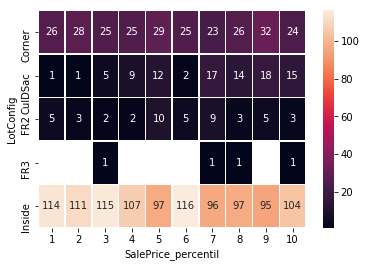

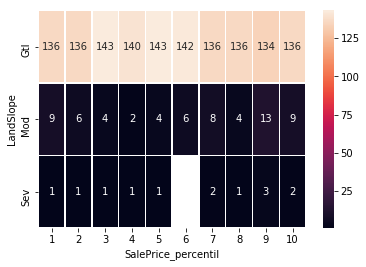

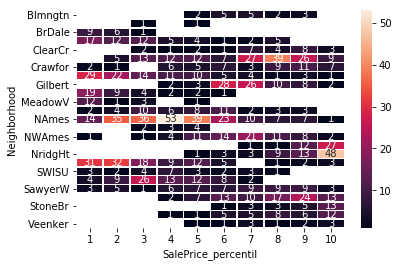

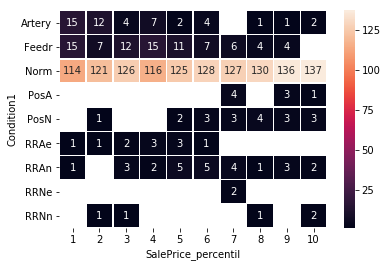

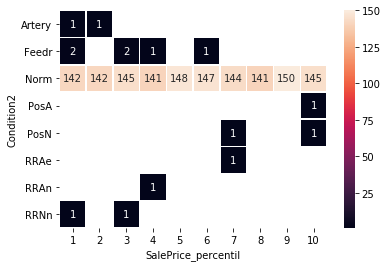

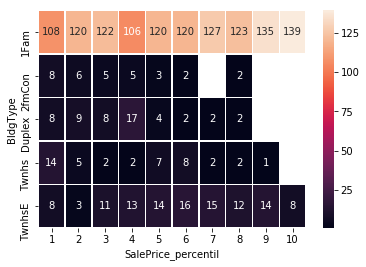

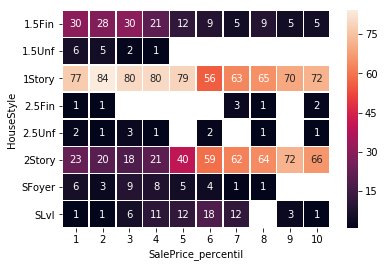

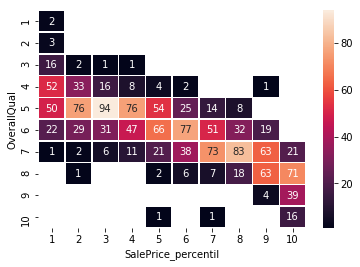

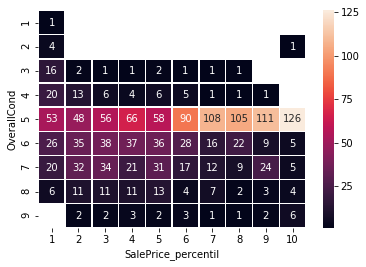

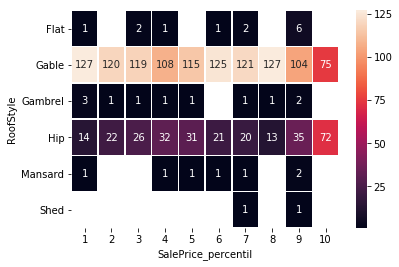

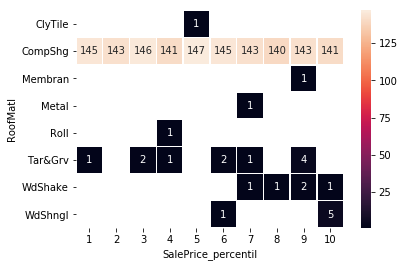

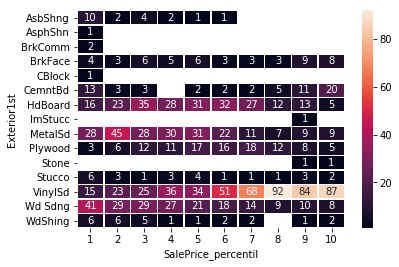

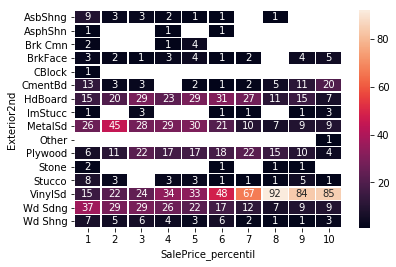

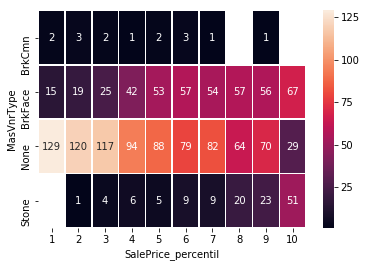

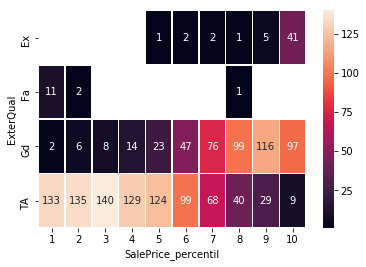

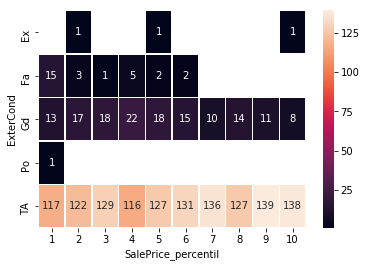

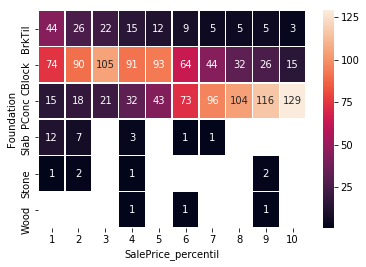

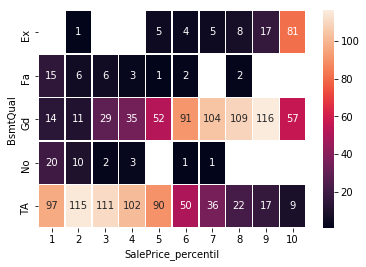

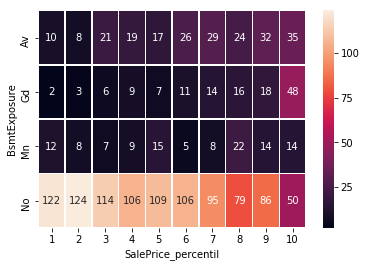

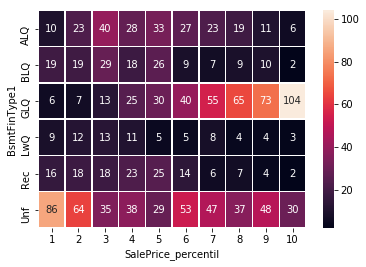

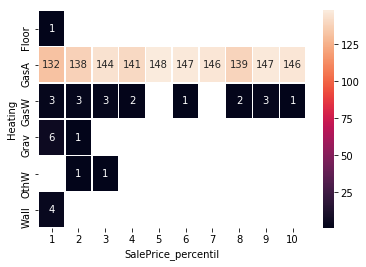

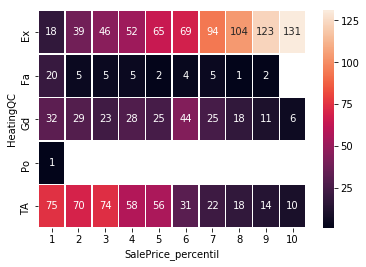

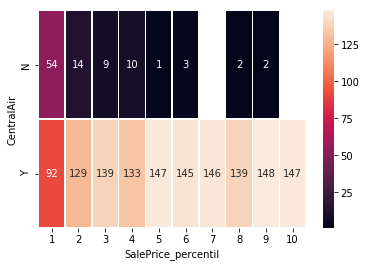

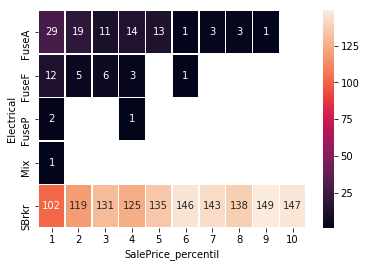

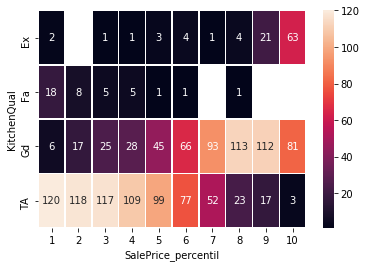

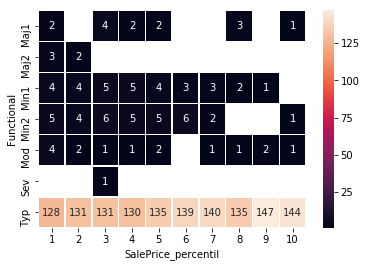

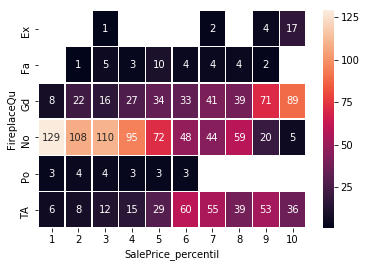

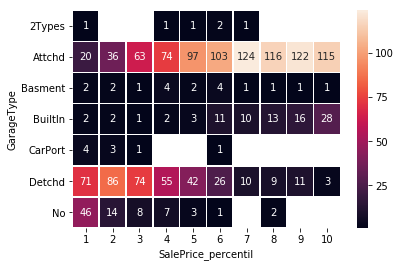

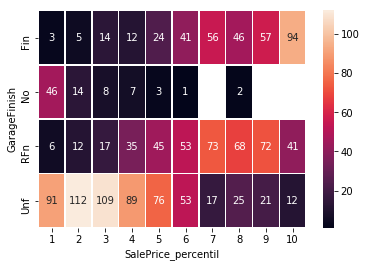

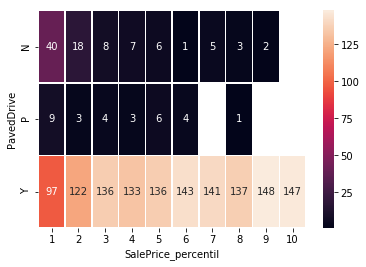

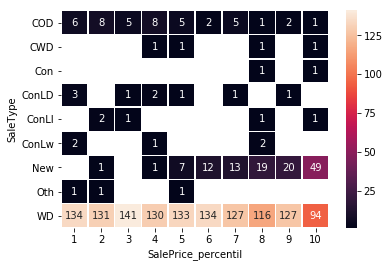

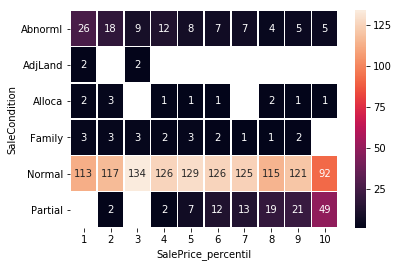

In [62]:
for i, variable in enumerate(categorical_columns):
    plt.figure(i)
    agg_dict = {'YearBuilt' : 'count'}
    heatmap = house_prices.groupby([variable,'SalePrice_percentil']).agg(agg_dict).copy()
    heatmap.reset_index(inplace= True)
    heatmap = heatmap.pivot(variable,'SalePrice_percentil', 'YearBuilt').copy()
    print('-------------------')
    print('#NAs= '+str(house_prices[variable].isnull().sum()))
    print(variable)
    sns.heatmap(heatmap, linewidths=.5, fmt='g',annot=True)